<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Count_vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

In [2]:

uploaded = files.upload()

Saving Vannskade_år_count.xlsx to Vannskade_år_count.xlsx


In [87]:
kol = ['Produktkode','Skadedato','År','Årsak','Ant']

data = pd.read_excel('Vannskade_år_count.xlsx',skiprows=0,names=kol)
data.drop(data.loc[data['År']<2000].index, inplace=True) #fjerner år mindre nn 2000
data.fillna(0)

,Produktkode,Skadedato,År,Årsak,Ant
0,L05,2000-10-10,2000,Vann utenfra,1
1,L05,2000-10-20,2000,Tilstopping,1
2,L05,2000-10-28,2000,Vann utenfra,1
3,L05,2000-10-30,2000,Vann utenfra,1
4,L05,2000-11-01,2000,Vann utenfra,1
...,...,...,...,...,...
12238,P20,2021-04-10,2021,Frost,1
12239,P20,2021-04-17,2021,Frost,1
12240,P20,2021-04-21,2021,Vann utenfra,1
12241,P20,2021-04-23,2021,Frost,1


In [109]:
for i in år:
  a= data.loc[(data['Årsak']=='Vann utenfra') & (data['År']==i)]['Ant'].sum()
  print(a)

60
87
202
333
388
338
394
416
401
371
754
1188
519
1069
816
773
647
866
904
850
1077


In [135]:
# summere ant skadenummer per år per skadeårsak
#sum_list = []
dt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = data.loc[(data['Årsak']==i) & (data['År']==j)]['Ant'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dt[str(i)] = årlig

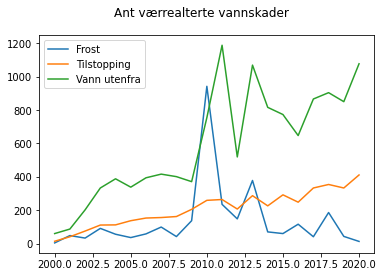

In [138]:
fig,ax = plt.subplots()
fig.suptitle('Ant værrealterte vannskader')
for i,j in enumerate(cols):
  ax.plot(år,dt[cols[i]],label=cols[i])
plt.legend()
plt.show()

In [140]:
dt.to_excel("output_test.xlsx")